In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm
import matplotlib.lines as lines
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

df = pd.read_csv('movie_metadata.csv')
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [139]:
(df.count()/df.shape[0] * 100)

color                         99.623240
director_name                 97.937735
num_critic_for_reviews        99.008527
duration                      99.702558
director_facebook_likes       97.937735
actor_3_facebook_likes        99.543922
actor_2_name                  99.742217
actor_1_facebook_likes        99.861194
gross                         82.470752
genres                       100.000000
actor_1_name                  99.861194
movie_title                  100.000000
num_voted_users              100.000000
cast_total_facebook_likes    100.000000
actor_3_name                  99.543922
facenumber_in_poster          99.742217
plot_keywords                 96.966092
movie_imdb_link              100.000000
num_user_for_reviews          99.583581
language                      99.762046
country                       99.900853
content_rating                93.991672
budget                        90.243902
title_year                    97.858418
actor_2_facebook_likes        99.742217


In [140]:
df.isna().sum()


color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [141]:
def replace_nan(x):
    if pd.isna(x) :
        x = 0
    return x

df = df.applymap(replace_nan)
df

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,0,Doug Walker,0.0,0.0,131.0,0.0,Rob Walker,131.0,0.0,Documentary,...,0.0,0,0,0,0.0,0.0,12.0,7.1,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,0.0,Comedy|Drama,...,6.0,English,Canada,0,0.0,2013.0,470.0,7.7,0.00,84
5039,Color,0,43.0,43.0,0.0,319.0,Valorie Curry,841.0,0.0,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,0.0,0.0,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,0.0,Drama|Horror|Thriller,...,3.0,English,USA,0,1400.0,2013.0,0.0,6.3,0.00,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,0.0,2012.0,719.0,6.3,2.35,660


In [142]:
df.isna().sum()

color                        0
director_name                0
num_critic_for_reviews       0
duration                     0
director_facebook_likes      0
actor_3_facebook_likes       0
actor_2_name                 0
actor_1_facebook_likes       0
gross                        0
genres                       0
actor_1_name                 0
movie_title                  0
num_voted_users              0
cast_total_facebook_likes    0
actor_3_name                 0
facenumber_in_poster         0
plot_keywords                0
movie_imdb_link              0
num_user_for_reviews         0
language                     0
country                      0
content_rating               0
budget                       0
title_year                   0
actor_2_facebook_likes       0
imdb_score                   0
aspect_ratio                 0
movie_facebook_likes         0
dtype: int64

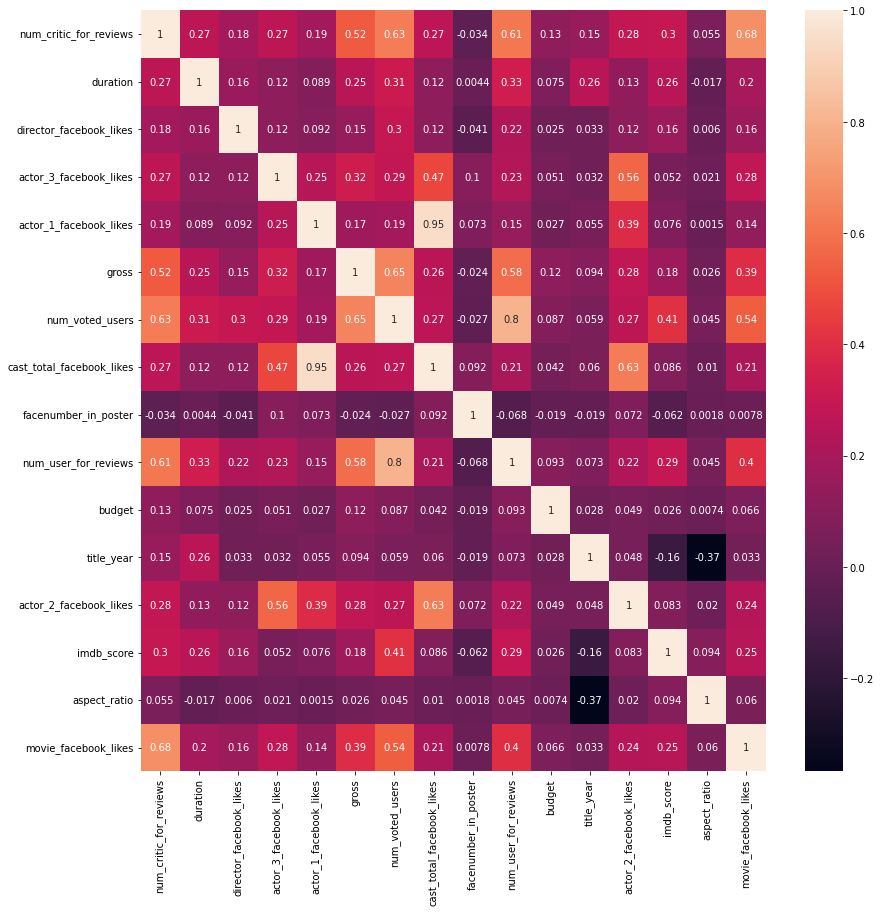

In [143]:
plt.figure(figsize=(14,14))
sns.heatmap(df.corr(),annot=True)
plt.show()


In [144]:
int_columns = df.select_dtypes(int)
int_columns

,num_voted_users,cast_total_facebook_likes,movie_facebook_likes
0,886204,4834,33000
1,471220,48350,0
2,275868,11700,85000
3,1144337,106759,164000
4,8,143,0
...,...,...,...
5038,629,2283,84
5039,73839,1753,32000
5040,38,0,16
5041,1255,2386,660


In [145]:
float_columns = df.select_dtypes(float)
float_columns

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio
0,723.0,178.0,0.0,855.0,1000.0,760505847.0,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78
1,302.0,169.0,563.0,1000.0,40000.0,309404152.0,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35
2,602.0,148.0,0.0,161.0,11000.0,200074175.0,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35
3,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35
4,0.0,0.0,131.0,0.0,131.0,0.0,0.0,0.0,0.0,0.0,12.0,7.1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,1.0,87.0,2.0,318.0,637.0,0.0,2.0,6.0,0.0,2013.0,470.0,7.7,0.00
5039,43.0,43.0,0.0,319.0,841.0,0.0,1.0,359.0,0.0,0.0,593.0,7.5,16.00
5040,13.0,76.0,0.0,0.0,0.0,0.0,0.0,3.0,1400.0,2013.0,0.0,6.3,0.00
5041,14.0,100.0,0.0,489.0,946.0,10443.0,5.0,9.0,0.0,2012.0,719.0,6.3,2.35


In [146]:
df_model = pd.concat([int_columns, float_columns], axis=1)
df_model


,num_voted_users,cast_total_facebook_likes,movie_facebook_likes,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio
0,886204,4834,33000,723.0,178.0,0.0,855.0,1000.0,760505847.0,0.0,3054.0,237000000.0,2009.0,936.0,7.9,1.78
1,471220,48350,0,302.0,169.0,563.0,1000.0,40000.0,309404152.0,0.0,1238.0,300000000.0,2007.0,5000.0,7.1,2.35
2,275868,11700,85000,602.0,148.0,0.0,161.0,11000.0,200074175.0,1.0,994.0,245000000.0,2015.0,393.0,6.8,2.35
3,1144337,106759,164000,813.0,164.0,22000.0,23000.0,27000.0,448130642.0,0.0,2701.0,250000000.0,2012.0,23000.0,8.5,2.35
4,8,143,0,0.0,0.0,131.0,0.0,131.0,0.0,0.0,0.0,0.0,0.0,12.0,7.1,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,629,2283,84,1.0,87.0,2.0,318.0,637.0,0.0,2.0,6.0,0.0,2013.0,470.0,7.7,0.00
5039,73839,1753,32000,43.0,43.0,0.0,319.0,841.0,0.0,1.0,359.0,0.0,0.0,593.0,7.5,16.00
5040,38,0,16,13.0,76.0,0.0,0.0,0.0,0.0,0.0,3.0,1400.0,2013.0,0.0,6.3,0.00
5041,1255,2386,660,14.0,100.0,0.0,489.0,946.0,10443.0,5.0,9.0,0.0,2012.0,719.0,6.3,2.35


In [147]:
l = train_test_split(df_model) #test_size= 0.30
l

[      num_voted_users  cast_total_facebook_likes  movie_facebook_likes  \
 3134            63108                      15251                 15000   
 3357           293304                      15554                 65000   
 465             58184                      17786                     0   
 2554             9566                       3107                  1000   
 3305             3624                       2007                   313   
 ...               ...                        ...                   ...   
 340           1100446                      23052                 10000   
 4628             6256                       1825                   936   
 4562             9540                        198                 14000   
 239            328067                      23755                 68000   
 4768              292                       1038                   353   
 
       num_critic_for_reviews  duration  director_facebook_likes  \
 3134                   183.0 

In [148]:
y_train = l[0]['imdb_score']
X_train = l[0].drop(['imdb_score'], axis=1)
y_test = l[1]['imdb_score']
X_test = l[1].drop(['imdb_score'], axis=1)

In [149]:
model = LinearRegression().fit(X_train, y_train)
model.score(X_train, y_train)

0.2798967951372333

In [150]:
model = LinearRegression().fit(X_test, y_test)
model.score(X_test, y_test)

0.2931344728422629